# Rendering with Mitsuba 3

## Overview

In this tutorial, you will learn how to render you very first image using Mitsuba 3!

<div class="admonition important alert alert-block alert-info">

🚀 **What will you learn?**

<ul>
  <li>Import mitsuba and set the variant</li>
  <li>Load a scene from disk</li>
  <li>Render a scene</li>
  <li>Write a rendered image to disk</li>
</ul>

</div>

### Step 1 - Import Mitsuba

Assuming it is already installed on you system, you can import Mitsuba 3 in your Python code like this:

In [1]:
import mitsuba as mi

We use the short alias `mi` for `mitsuba` for better readability of code.

Mitsuba is a *retargetable* system, meaning that it is possible to choose between different flavour of computational backends (e.g. CPU vs GPU), and change other aspects of the renderer (e.g. RGB vs spectral rendering, single vs double precision, etc...). Without going further into the details here, what's important to take away from this is that it is necessary to tell the system which *variant* of the renderer should be enabled before doing anything else.

This can be achieved using the `mi.set_variant(<variant_name>)` function. For more information on this subject, please refer to the [dedicated section](../src/getting_started/variants.rst) in the documentation.

For this tutorial, we are going to stick with the simplest of all variants: `scalar_rgb`. As the name implies, computations will be performed in a scalar-fashion (e.g. non-vectorized code running on the CPU) and the light transport simulation will operate on RGB color values. As we will see in further tutorials, switching to a different variant of the system (e.g. GPU) should be possible by simply setting a different variant name here.

In [2]:
mi.set_variant('scalar_rgb')

### Step 2 - Loading a scene

In this tutorial, we are going to load a Mitsuba scene from a file on disk. Mitsuba scenes are described using a simple and general XML-based format as explained in the [documentation](../src/getting_started/file_format.rst).

Luckily for us, a few scenes were already provided during the installation with `pip install`. In order to load a scene, we can pass its file path to the [<code>mi.load_file</code>][1] as follow.

[1]: https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html?highlight=load_file#mitsuba.core.load_file

In [3]:
scene = mi.load_file('../../scenes/cbox.xml')

2022-03-09 11:55:33 INFO main [xml.cpp:1260] Loading XML file "../scenes/cbox.xml" with variant "scalar_rgb"..

2022-03-09 11:55:35 INFO main [Scene] Embree ready. (took 1ms)

2022-03-09 11:55:35 INFO main [xml.cpp:1319] Done loading XML file "../scenes/cbox.xml" (took 2.091s).

### Step 3 - Render a scene

To render a scene, Mitsuba provides a high level `mi.render` function that can be used as follow:

In [4]:
image = mi.render(scene, spp=256)

2022-03-09 11:55:36 INFO main [SamplingIntegrator] Starting render job (256x256, 256 samples, 10 threads)

2022-03-09 11:55:38 INFO main [SamplingIntegrator] Rendering finished. (took 2.345s)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


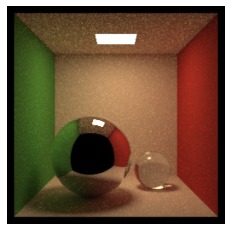

In [5]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(image ** (1.0 / 2.2));

### Step 4 - Scene modification

In [6]:
params = mi.traverse(scene)
params

SceneParameters[
  ----------------------------------------------------------------------------------------
  Name                                 Flags    Type            Parent
  ----------------------------------------------------------------------------------------
  sensor.near_clip                              float           PerspectiveCamera
  sensor.far_clip                               float           PerspectiveCamera
  sensor.shutter_open                           float           PerspectiveCamera
  sensor.shutter_open_time                      float           PerspectiveCamera
  sensor.x_fov                                  float           PerspectiveCamera
  sensor.to_world                               Transform4f     PerspectiveCamera
  gray.reflectance.value               ∂        Color3f         SRGBReflectanceSpectrum
  white.reflectance.value              ∂        Color3f         SRGBReflectanceSpectrum
  green.reflectance.value              ∂        Color3f       

In [7]:
# Change the camera point of view
params['sensor.to_world'] = mi.Transform4f.look_at(
    origin=[0.45, 0.45, 5],
    target=[0, 0, 0],
    up=[0, 1, 0]
)

# Change the color of the green wall to blue
params['green.reflectance.value'] = mi.Color3f(0.1, 0.1, 0.9)

# Apply updates
params.update()

2022-03-09 11:55:53 INFO main [SamplingIntegrator] Starting render job (256x256, 128 samples, 10 threads)

2022-03-09 11:55:53 INFO main [SamplingIntegrator] Rendering finished. (took 699ms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


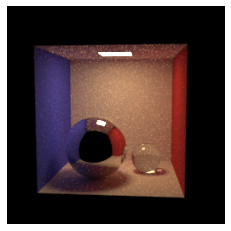

In [8]:
image = mi.render(scene, spp=128)
plt.axis('off')
plt.imshow(image ** (1.0 / 2.2));

### Step 5 - Write image to file

This rendering function returns the rendered image in the form of `mi.TensorXf` variable (similar to numpy array). This is great in the case we want to continue manipulating this image in Python. For image I/O, Mitsuba 3 provides the `mi.Bitmap` class, which exposes a `write()` method to write the image to disk.

In [10]:
mi.util.write_bitmap('my_first_render.png', image)
mi.util.write_bitmap('my_first_render.exr', image)

🎉 !! And BRAVO !! 🎉

You have now successfully performed your first render!

### *Reference API*

- [<code>mitsuba.set_variant</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.set_variant)
- [<code>mitsuba.load_file</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.load_file)
- [<code>mitsuba.render</code>](https://mitsuba2.readthedocs.io/en/latest/generated/python_api.html#mitsuba.python.util.render)
- [<code>mitsuba.Bitmap.write</code>](https://mitsuba2.readthedocs.io/en/latest/generated/core_api.html#mitsuba.core.Bitmap.write)